In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
file_path = 'student-mat.csv'
df = pd.read_csv(file_path, sep=',')

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

В датасете 395 записей. 33 строки, из которых 16 числовые, а 17 категориальные.

In [6]:
df.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


In [7]:
"Пропущенные значения в колонках", df.isnull().sum()

('Пропущенные значения в колонках',
 school        0
 sex           0
 age           0
 address       0
 famsize       0
 Pstatus       0
 Medu          0
 Fedu          0
 Mjob          0
 Fjob          0
 reason        0
 guardian      0
 traveltime    0
 studytime     0
 failures      0
 schoolsup     0
 famsup        0
 paid          0
 activities    0
 nursery       0
 higher        0
 internet      0
 romantic      0
 famrel        0
 freetime      0
 goout         0
 Dalc          0
 Walc          0
 health        0
 absences      0
 G1            0
 G2            0
 G3            0
 dtype: int64)

Пропущенных значений нет

In [8]:
num_cols =  df[['age','absences', 'G1', 'G2', 'G3']]
numerical = df.select_dtypes(include='int64')
categorical = df.select_dtypes(include='object')

Из оригинального датасета выбраны числовые и категориальные сабсеты

In [9]:
corr = numerical.corr()

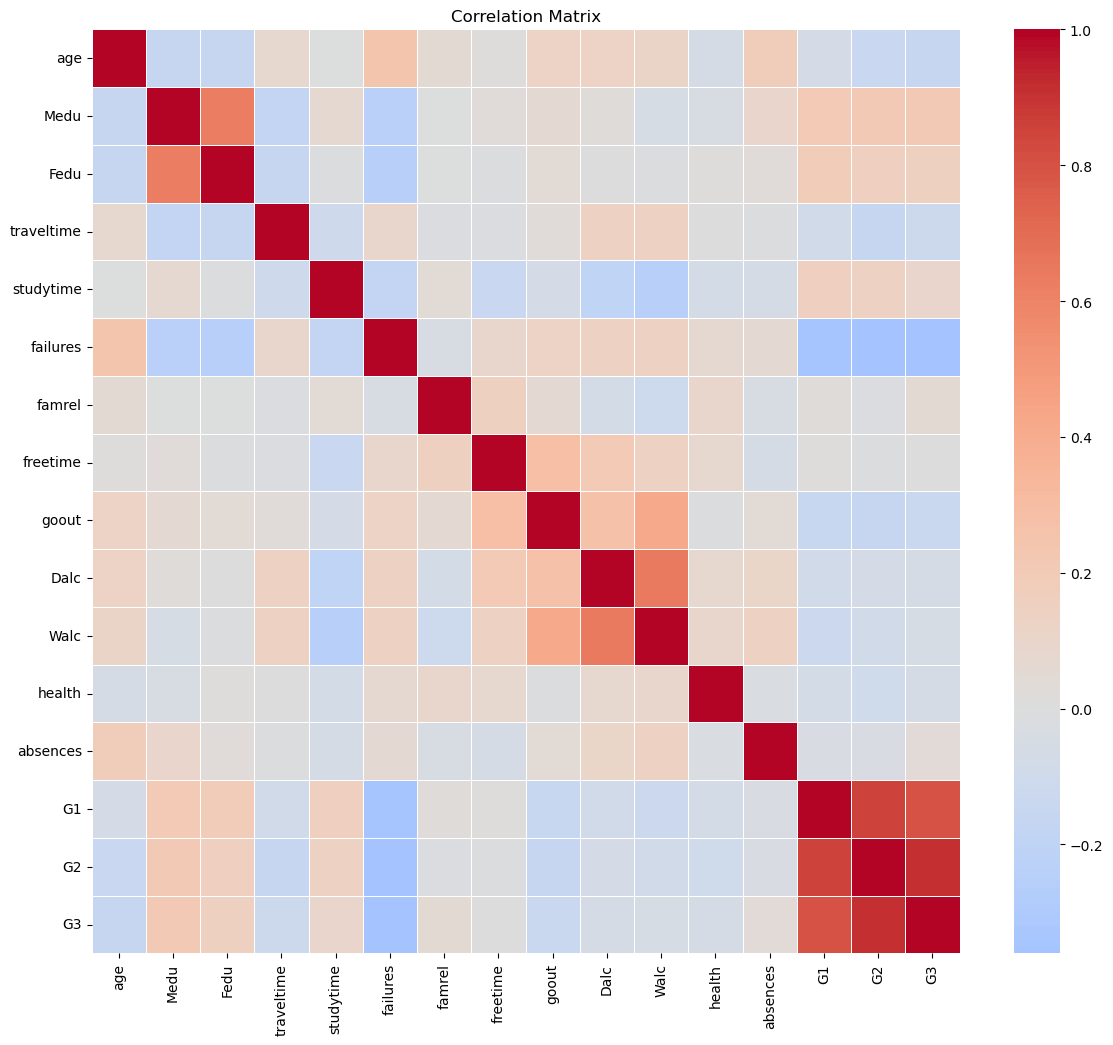

In [10]:
plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [11]:
top_features = corr['G3'].abs().sort_values(ascending=False)
print("Признаки, имеющие наибольшую корреляцию с G3:\n", top_features.head(10))

Признаки, имеющие наибольшую корреляцию с G3:
 G3            1.000000
G2            0.904868
G1            0.801468
failures      0.360415
Medu          0.217147
age           0.161579
Fedu          0.152457
goout         0.132791
traveltime    0.117142
studytime     0.097820
Name: G3, dtype: float64


Единственные переменные, имеющие высокую корреляцию - G1 и G2

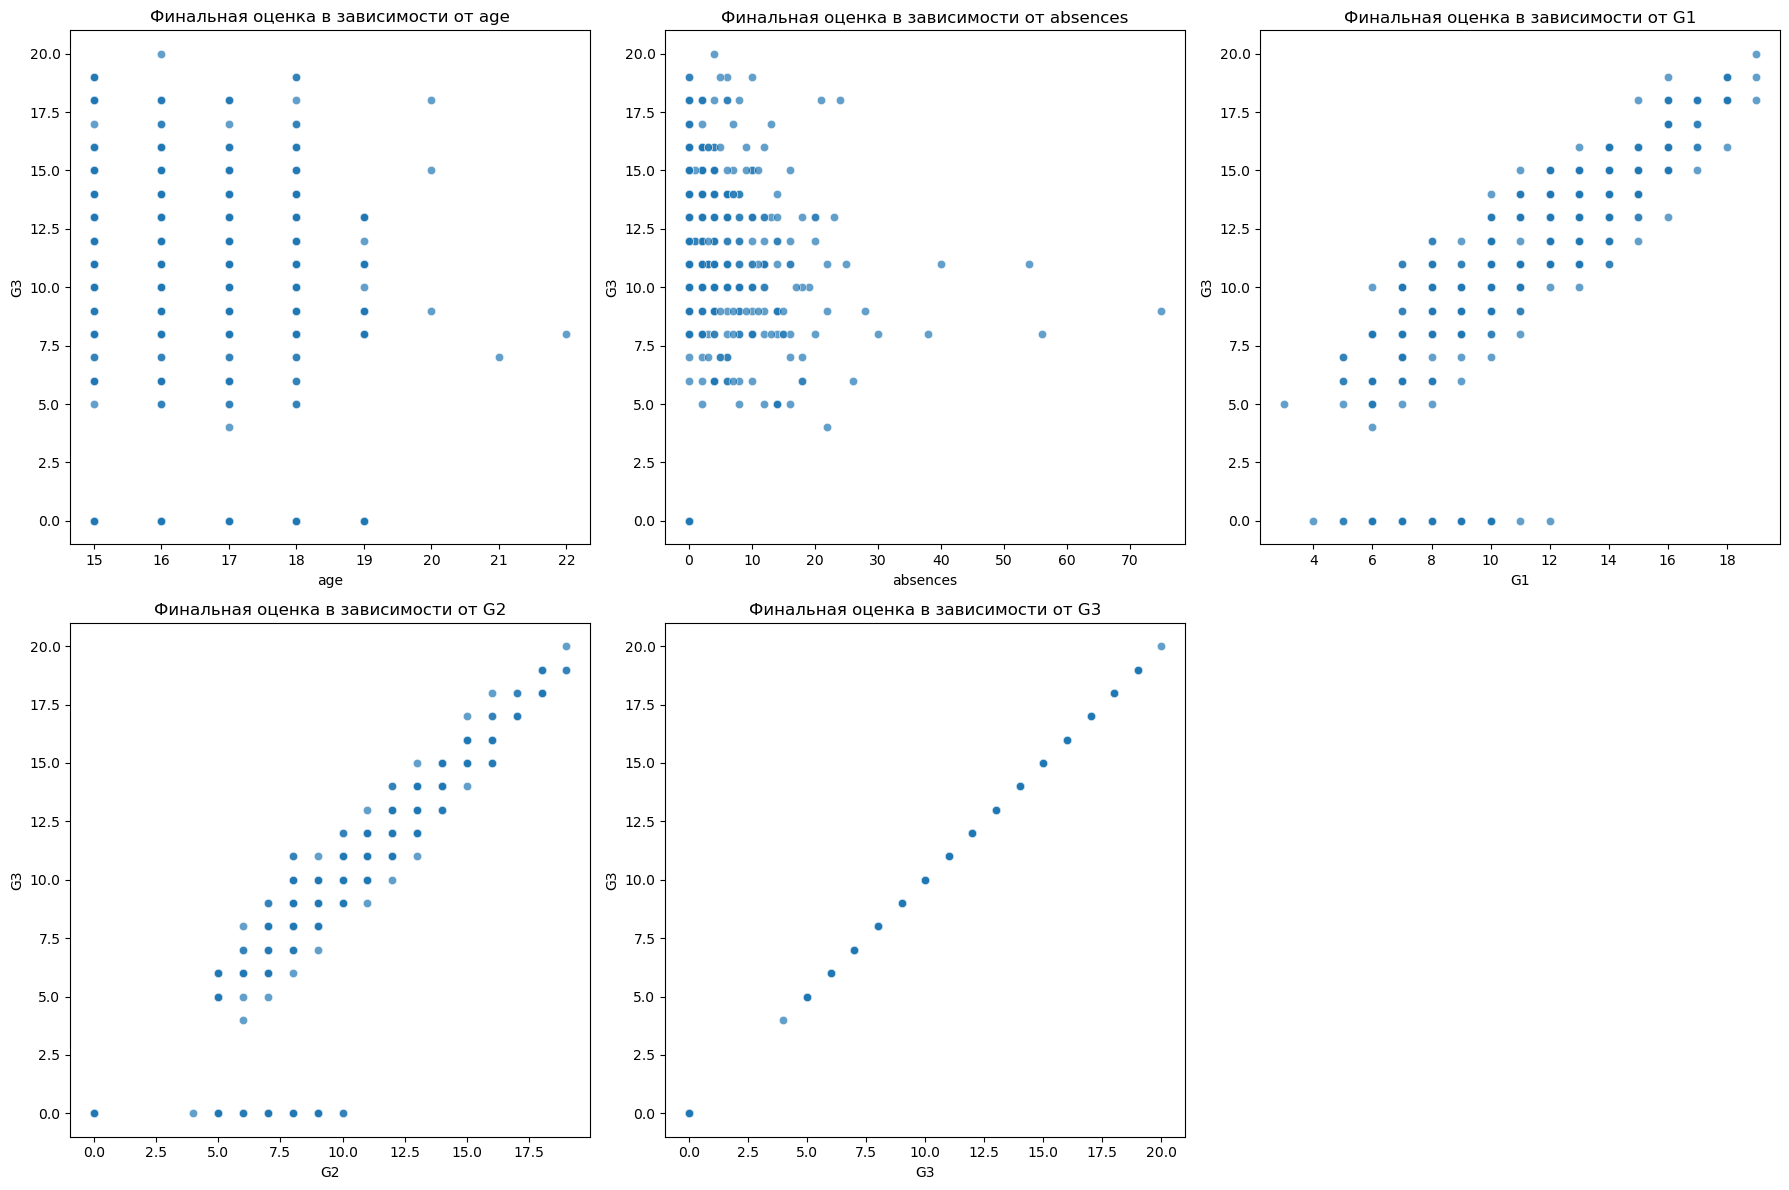

In [12]:
plt.figure(figsize=(18, 12))
for i, feature in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=feature, y='G3', alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('G3')
    plt.title(f'Финальная оценка в зависимости от {feature}')
    plt.tight_layout()
plt.show()

G3 имеет линейную зависимость от G1 и G2

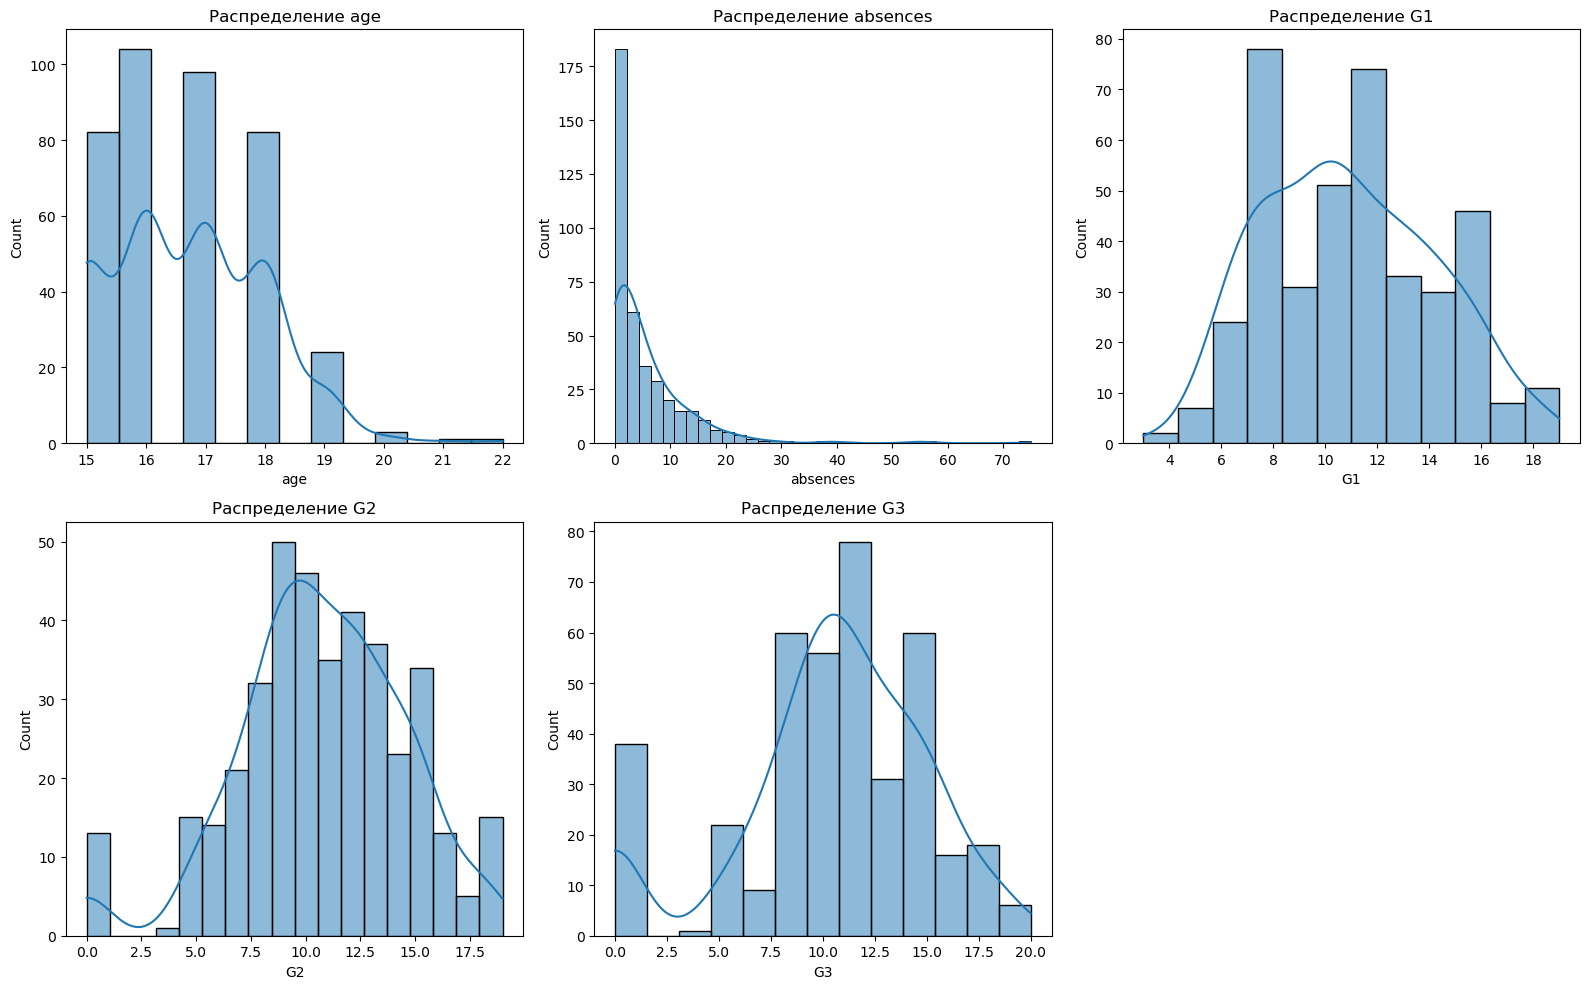

In [13]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(num_cols[col], kde=True)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

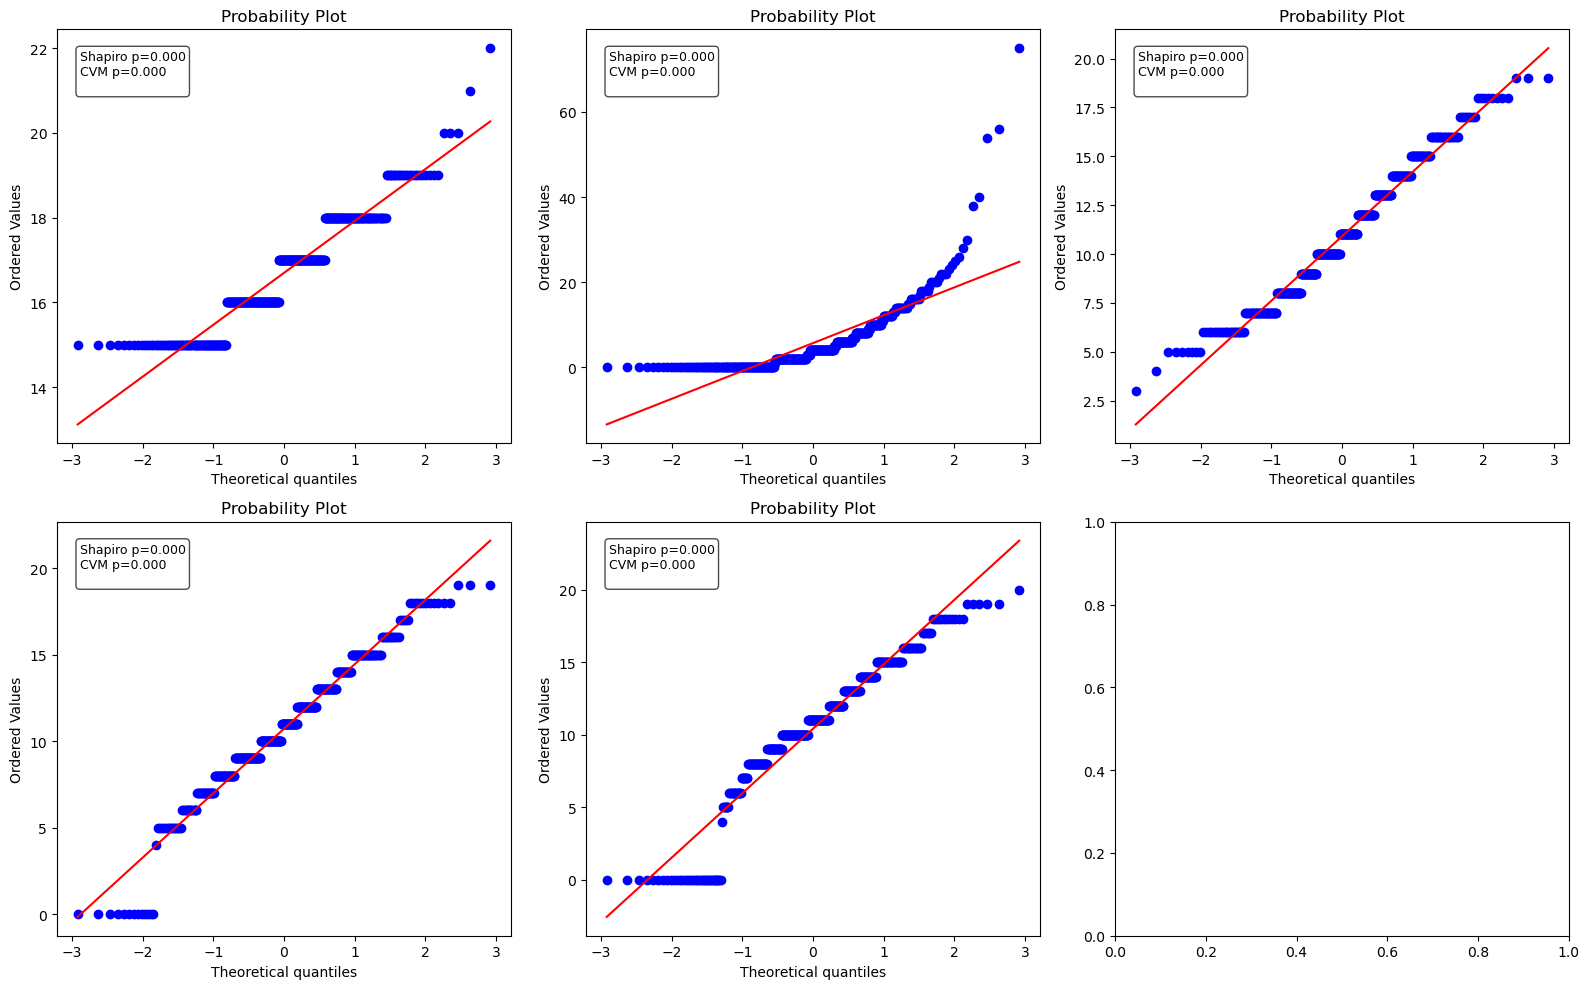

In [14]:
cols = 3
rows = (len(num_cols.columns) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 5*rows))
axes = axes.flatten()
for ax, col in zip(axes, num_cols.columns):
    # Q-Q plot
    stats.probplot(num_cols[col], dist='norm', plot=ax)
    # Normality tests
    sw_stat, sw_p = stats.shapiro(num_cols[col])
    cvm_result = stats.cramervonmises(num_cols[col], 'norm')
    # Annotation text
    text = (f'Shapiro p={sw_p:.3f}\n'
            f'CVM p={cvm_result.pvalue:.3f}\n')
    ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
for ax in axes[len(num_cols):]:
    fig.delaxes(ax)
plt.tight_layout()
plt.show()

Ни одна переменная не имеет нормального распределения

In [15]:
numerical.drop(['absences', 'G1', 'G2', 'G3'], axis= 1, inplace= True)

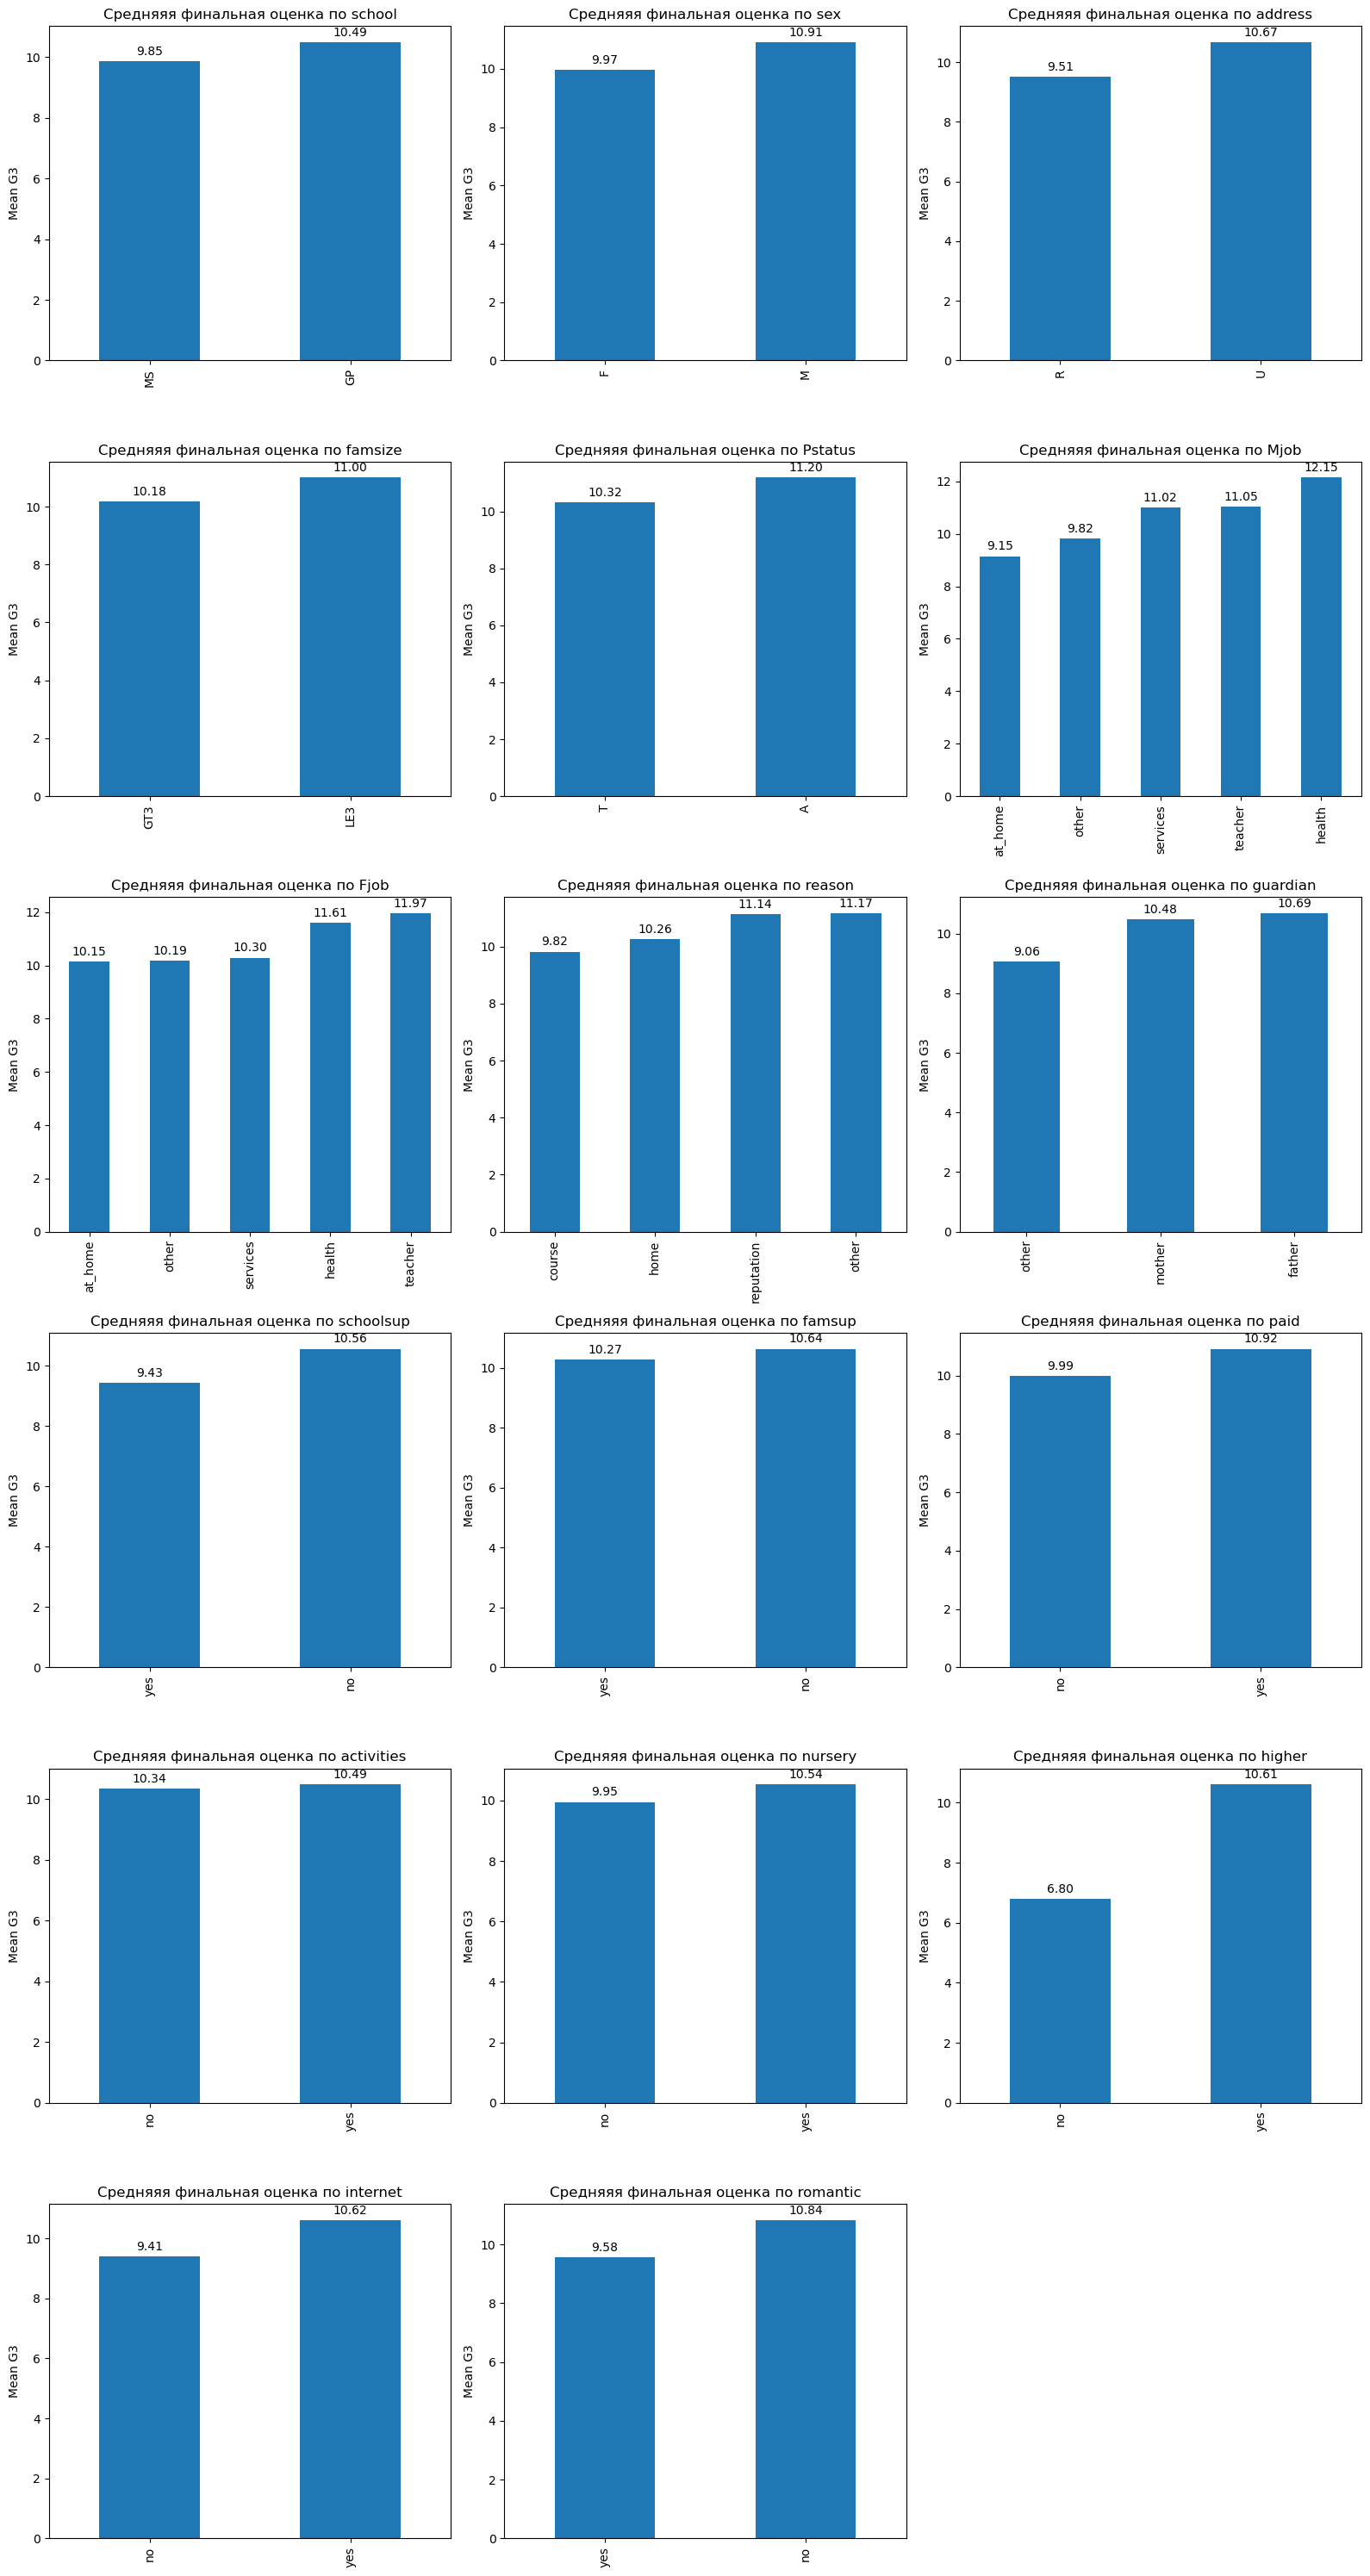

In [16]:
n_cat = len(categorical.columns)
cols = 3
rows = (n_cat + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 5*rows))
axes = axes.flatten()
for ax, col in zip(axes, categorical.columns):
    vals = df.groupby(col)['G3'].mean().sort_values()
    bars = vals.plot(kind='bar', ax=ax)
    for bar in bars.patches:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x()+bar.get_width()/2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')
    ax.set_title(f'Средняяя финальная оценка по {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Mean G3')
for ax in axes[n_cat:]:
    fig.delaxes(ax)
plt.tight_layout()
plt.show()

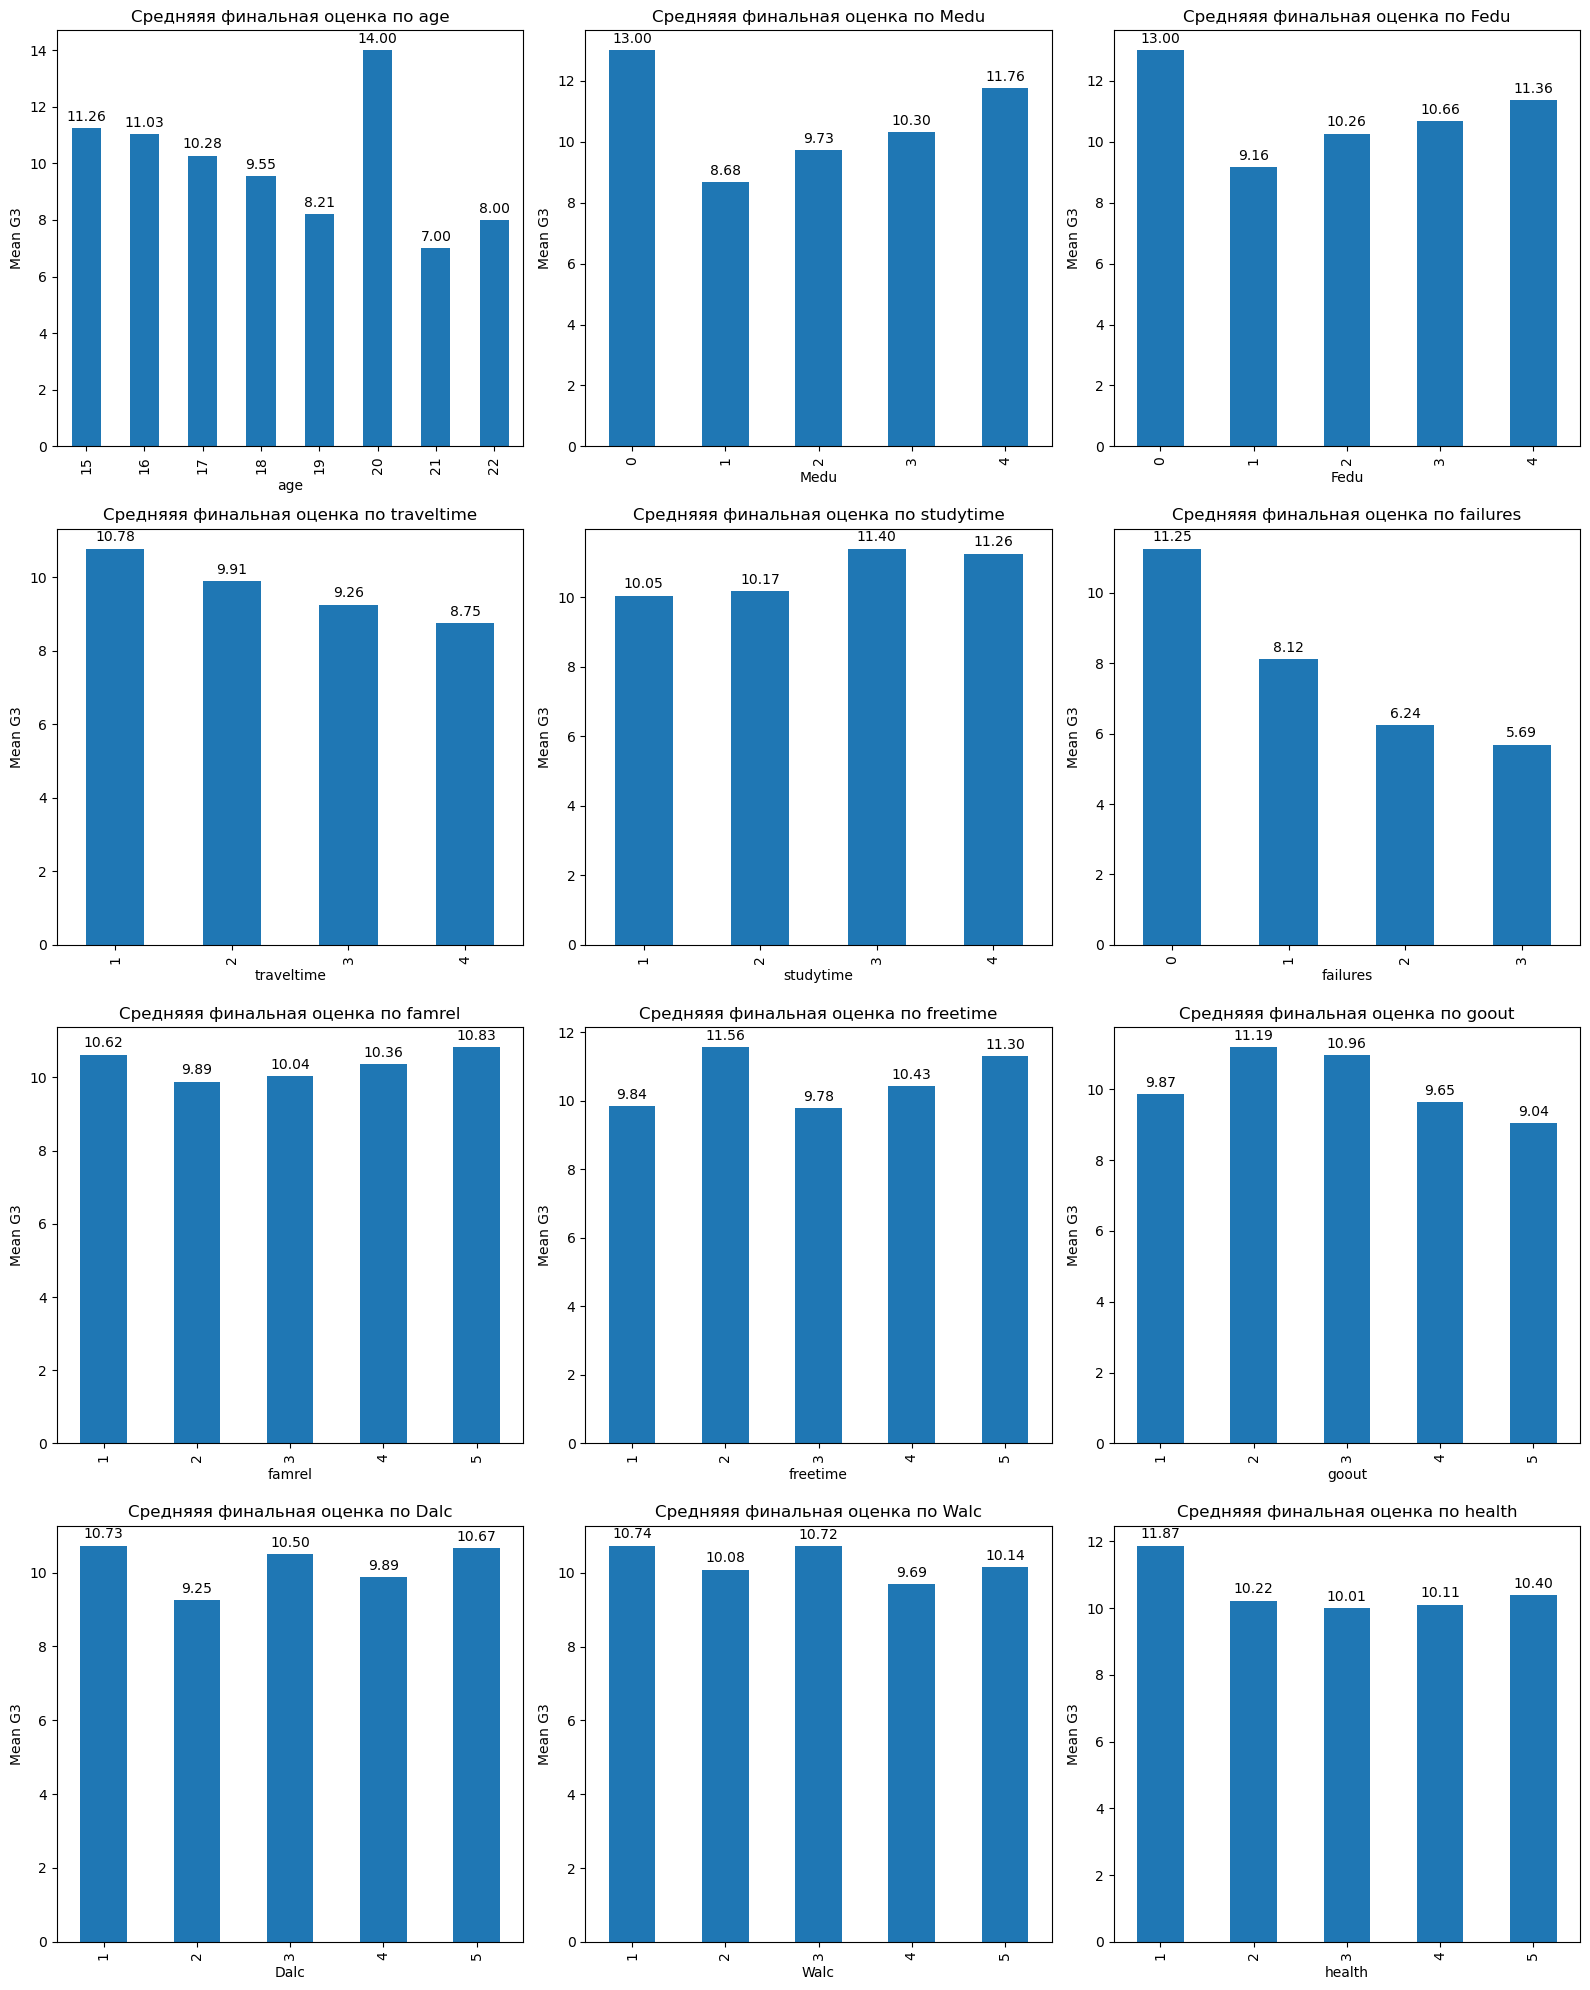

In [17]:
cols = 3
rows = (len(numerical.columns) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 5*rows))
axes = axes.flatten()
for ax, col in zip(axes, numerical.columns):
    vals = df.groupby(col)['G3'].mean()
    bars = vals.plot(kind='bar', ax=ax)
    for bar in bars.patches:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x()+bar.get_width()/2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')
    ax.set_title(f'Средняяя финальная оценка по {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Mean G3')
for ax in axes[len(numerical.columns):]:
    fig.delaxes(ax)
plt.tight_layout()
plt.show()